In [3]:
import torch
from matplotlib import pyplot as plt
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

In [4]:
class XORDataset(Dataset):
    def __init__(self, X1, X2, y):
        super().__init__()
        self.X1 = X1.reshape(-1, 1)
        self.X2 = X2.reshape(-1, 1)
        self.y = y.reshape(-1, 1)
    
    def __len__(self):
        return self.X1.shape[0]
    
    def __getitem__(self, index):
        return self.X1[index], self.X2[index], self.y[index]

In [26]:
class XOR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 2, bias= True)
        self.activate1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1, bias= True)
        self.activate2 = nn.Sigmoid()
    
    def forward(self, x1, x2):
        x = torch.cat((x1, x2), dim= 1)
        z1 = self.linear1(x)
        a1 = self.activate1(z1)
        z2 = self.linear2(a1)
        a2 = self.activate2(z2)
        return a2

In [27]:
X1 = torch.tensor([0, 0, 1, 1], dtype= torch.float32)
X2 = torch.tensor([0, 1, 0, 1], dtype= torch.float32)
y = torch.tensor([0, 1, 1, 0], dtype= torch.float32)

In [28]:
model = XOR()
dataset = XORDataset(X1=X1, X2=X2, y=y)
dataloader = DataLoader(dataset=dataset, batch_size=dataset.__len__(), shuffle= True)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.001)

In [29]:
loss_list = []
model.train()
for epoch in range(100):
    loss = 0.0
    for input1, input2, target in dataloader:
        optimizer.zero_grad()
        output = model(input1, input2)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        print(f'loss = {loss.item()}')
        a = loss
        loss_list.append(a.detach().numpy())

loss = 0.7064884901046753
loss = 0.7064782381057739
loss = 0.706467866897583
loss = 0.7064574956893921
loss = 0.7064472436904907
loss = 0.7064369320869446
loss = 0.7064266204833984
loss = 0.7064163088798523
loss = 0.7064060568809509
loss = 0.7063958048820496
loss = 0.7063855528831482
loss = 0.706375241279602
loss = 0.7063649892807007
loss = 0.7063547372817993
loss = 0.7063445448875427
loss = 0.7063342928886414
loss = 0.7063241600990295
loss = 0.706313967704773
loss = 0.7063037157058716
loss = 0.706293523311615
loss = 0.7062833309173584
loss = 0.7062731385231018
loss = 0.7062629461288452
loss = 0.7062528133392334
loss = 0.7062426805496216
loss = 0.706232488155365
loss = 0.7062223553657532
loss = 0.7062121629714966
loss = 0.7062021493911743
loss = 0.7061919569969177
loss = 0.7061819434165955
loss = 0.7061718106269836
loss = 0.7061617374420166
loss = 0.7061516642570496
loss = 0.7061415910720825
loss = 0.7061314582824707
loss = 0.7061214447021484
loss = 0.7061114311218262
loss = 0.70610135

[]

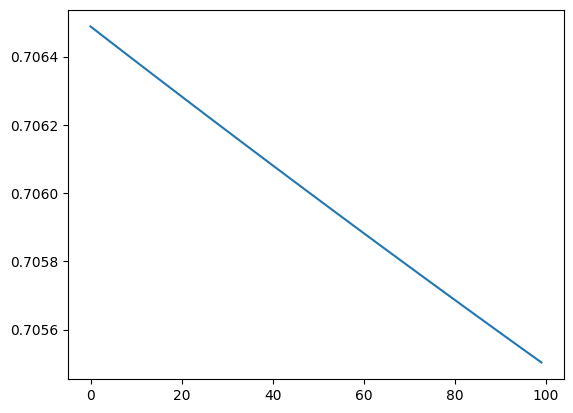

In [30]:
plt.plot(loss_list)
plt.plot()

In [44]:
x = torch.Tensor([0, 0]).unsqueeze(dim = 1)
print(x.shape)
# the weight matrix we get is (out_features, in_features)
# the bias we get is (outfeatures), we need to convert it to (outfeatures, 1)
w1, b1 = model.linear1.weight, model.linear1.bias.unsqueeze(dim = 1)
# print(w1, b1)
l1 = torch.matmul(w1, x) + b1
print(l1)
a1 = torch.sigmoid(l1)
print(a1.shape)
# note we can also use reshape
w2, b2 = model.linear2.weight, model.linear2.bias.reshape(-1, 1)
l2 = torch.matmul(w2, a1) + b2
a2 = torch.sigmoid(l2)
print(a2)

torch.Size([2, 1])
tensor([[ 0.3486],
        [-0.0462]], grad_fn=<AddBackward0>)
torch.Size([2, 1])
tensor([[0.4352]], grad_fn=<SigmoidBackward0>)
